In [1]:
import zfit

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
import load_save_data as l
import plot.histogram as h
from plot.fit import plot_hist_fit, plot_hist_fit_particle, plot_hist_fit_var
from fit import launch_fit, save_params

#from fit import launch_fit, plot_hist_fit, save_params, plot_hist_fit_particle

Welcome to JupyROOT 6.22/02


In [2]:
df = l.load_data(years, magnets, type_data='common', vars=['B0_M','tau_M', 'Dst_M'],
                            cut_DeltaM=True)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_down.root
cut on DeltaM has removed 425088 over 935261 events


In [3]:
h.plot_hist({'data':df, 'MC':df_MC},'B0_M','B0\_M','MeV/$c^2$', n_bins = 100,name_folder = 'test',mode_hist=True,colors='black')

NameError: name 'df_MC' is not defined

In [ ]:
type(df['B0_M'])

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
_ = ax.hist(df['B0_M'], bins=100, range=(5000, 6000), color='r')

fig = plt.gcf()
size = fig.get_size_inches()*fig.dpi
print(size)

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
_ = ax.hist(df_MC['B0_M'], bins=100, color='r')

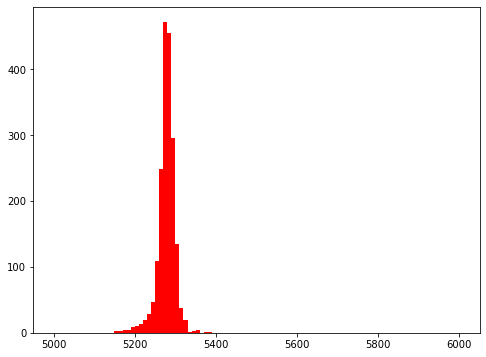

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

_ = ax.hist(df_MC['B0_M'], bins=100, range=(5000, 6000), color='r')

In [2]:
df_MC = l.load_data(years[:-1],magnets[:-1],type_data = 'MC',vars = ['B0_M','tau_M'],cut_DeltaM = True)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09e-ReDecay01.root
cut on DeltaM has removed 0 over 1922 events


In [ ]:
h.plot_hist({'MC':df_MC},'B0_M','B0\_M (MC)','MeV/$c^2$', n_bins = 100,name_folder = 'test',mode_hist=True,colors='black')

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/test/B0_M_MC_data_BDT0.2.pdf


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:title={'center':'MC data - BDT $>$ 0.2'}, xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='Candidates / (2 MeV/$c^2$)'>)

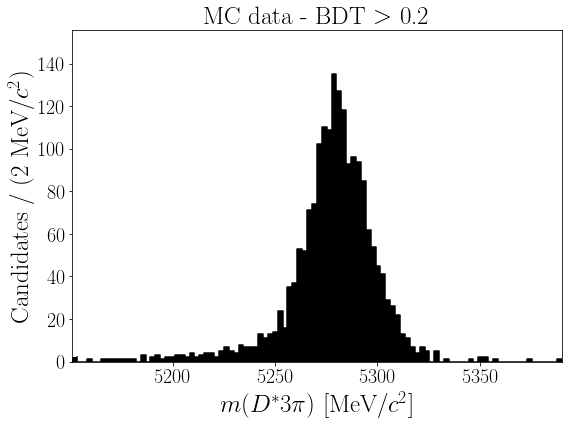

In [6]:
h.plot_hist_particle({'MC data':df_MC}, 'B0_M', '0.2', n_bins = 100, name_data_title=True, 
                     name_folder = 'test', mode_hist=True, colors='black')

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/test/B0_M_vs_tau_M_MC.pdf


(<Figure size 576x432 with 2 Axes>,
 <AxesSubplot:title={'center':'MC'}, xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='$m$($3\\pi$) [MeV/$c^2$]'>)

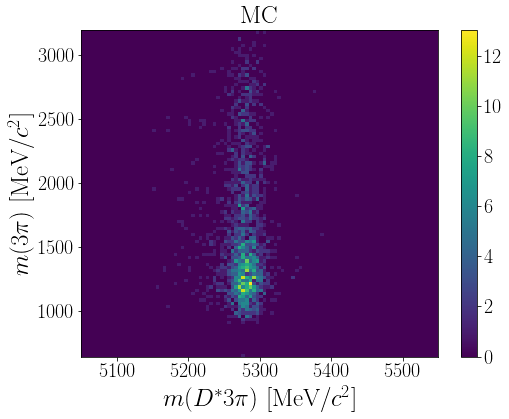

In [7]:
low_B0_M = 5050.
high_B0_M = 5550.

h.plot_hist2d_particle(df_MC,['B0_M','tau_M'],low=[low_B0_M,None],high=[high_B0_M,None],
                       name_data_title=True, 
                       name_folder = 'test', name_data='MC', n_bins=100)

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:287: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


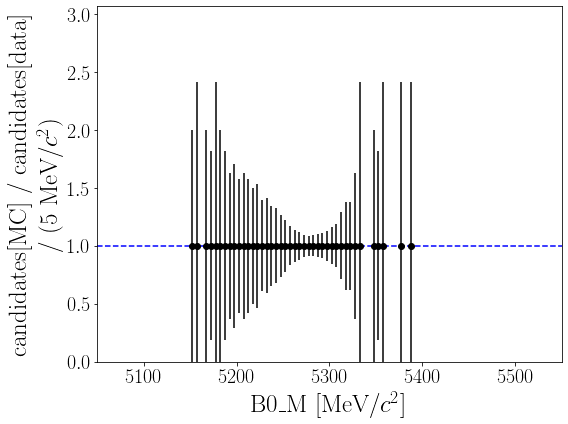

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/test/B0_M_MC_d_data.pdf


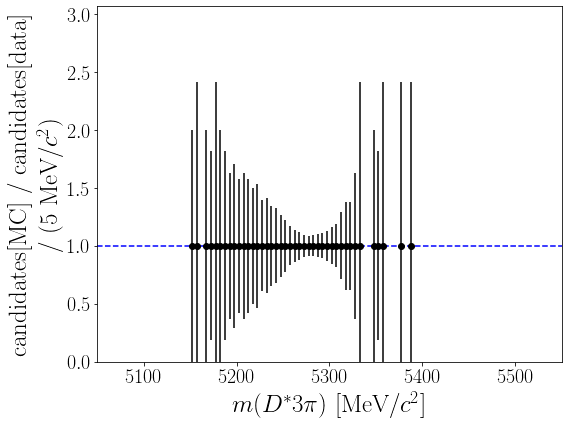

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/test/B0_M_MC_d_data.pdf


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='candidates[MC] / candidates[data] \n / (5 MeV/$c^2$)'>)

In [8]:
low_B0_M = 5050.
high_B0_M = 5550.

h.plot_divide({'MC':df_MC,'data':df_MC},'B0_M','B0\_M','MeV/$c^2$',
              low=low_B0_M, high=high_B0_M,
            name_folder = 'test', n_bins=100)

h.plot_divide_particle({'MC':df_MC,'data':df_MC},'B0_M',
              low=low_B0_M, high=high_B0_M,
            name_folder = 'test', n_bins=100)

In [3]:
low = 5050.
high = 5550.
obs = zfit.Space("x", limits=(low, high))
mu_MC = zfit.Parameter("mu_MC", 5280., 5250., 5300.)
sigma_MC = zfit.Parameter("sigma_MC", 20., 10., 60.)
alphaL_MC = zfit.Parameter("alphaL_MC", 2., 0.1, 5.)
alphaR_MC = zfit.Parameter("alphaR_MC", 2., 0.1, 5.)
nL_MC = zfit.Parameter("nL_MC", 2., 0.01, 10.)
nR_MC = zfit.Parameter("nR_MC", 2., 0.01, 10.)
frac = zfit.Parameter("frac", 0.5, 0.1, 1.)
n1 = zfit.Parameter("n1", 500., 0., 1000.)
n2 = zfit.Parameter("n2", 400., 0., 1000.)

In [4]:
name_params = {
    'mu_MC':'$\mu$',
    'sigma_MC':'$\sigma$',
    'alphaL_MC':'$\\alpha_L$',
    'alphaR_MC':'$\\alpha_R$',
    'nL_MC':'$n_L$',
    'nR_MC':'$n_R$',
}

doubleCB_MC = zfit.pdf.DoubleCB(mu_MC, sigma_MC, alphaL_MC, alphaR_MC, nL_MC, nR_MC, obs=obs)
doubleCB2_MC = zfit.pdf.DoubleCB(mu_MC, sigma_MC, alphaL_MC, alphaR_MC, nL_MC, nR_MC, obs=obs)
doubleCB3_MC = zfit.pdf.DoubleCB(mu_MC, sigma_MC, alphaL_MC, alphaR_MC, nL_MC, nR_MC, obs=obs)

model = zfit.pdf.SumPDF([doubleCB_MC,doubleCB2_MC], fracs=frac)
model_ext = model.create_extended(n1)
doubleCB3_MC_ext = doubleCB3_MC.create_extended(n2)
#data_MC = zfit.Data.from_pandas(df_MC['B0_M'],obs=obs)

In [5]:
model = zfit.pdf.SumPDF([doubleCB_MC,doubleCB2_MC], fracs=frac)

In [6]:
model_2 = zfit.pdf.SumPDF([model_ext,doubleCB3_MC_ext])

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:510: UserWarning: The function <function Space.limits at 0x7f3a584935f0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:34: UserWarning: The function <function Space.area at 0x7f3a5849b9e0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


Number of d.o.f. in the model:  7
Reduced chi2:  2.975437430945614


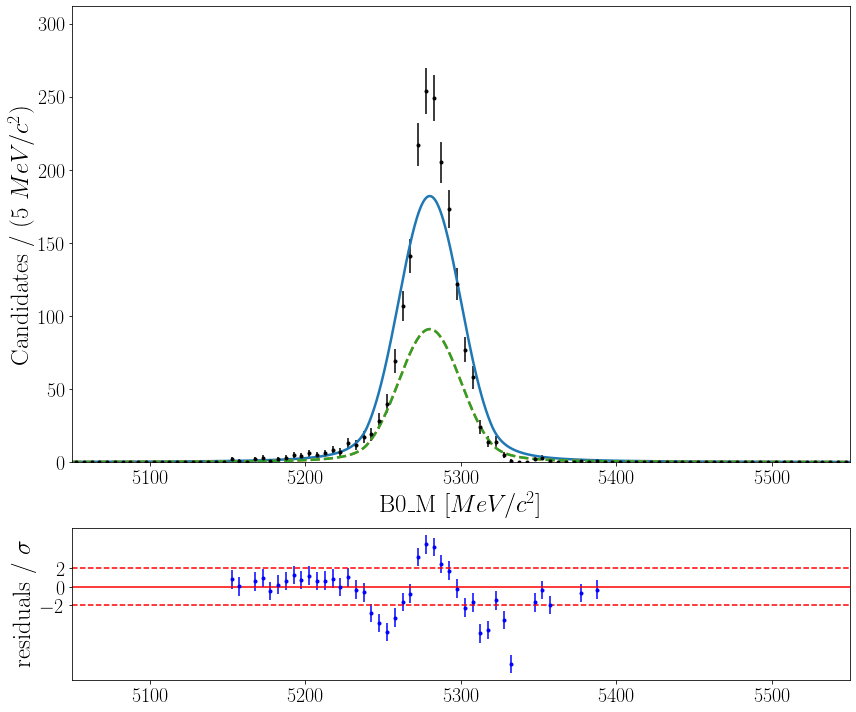

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/test/B0_M_MC_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='B0\\_M [$MeV/c^2$]', ylabel='Candidates / (5 $MeV/c^2$)'>,
 <AxesSubplot:ylabel='residuals / $\\sigma$'>)

In [7]:
plot_hist_fit_var(df_MC['B0_M'],'B0_M',None,'$MeV/c^2$',models = [model, doubleCB_MC, doubleCB_MC], obs=obs, n_bins = 100,mode_hist = False,
              name_folder = 'test',name_data = 'MC')   

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:510: UserWarning: The function <function Space.limits at 0x7f49e04d3710> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:34: UserWarning: The function <function Space.area at 0x7f49e04d8b00> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


Number of d.o.f. in the model:  7
Reduced chi2:  2.975437430945614


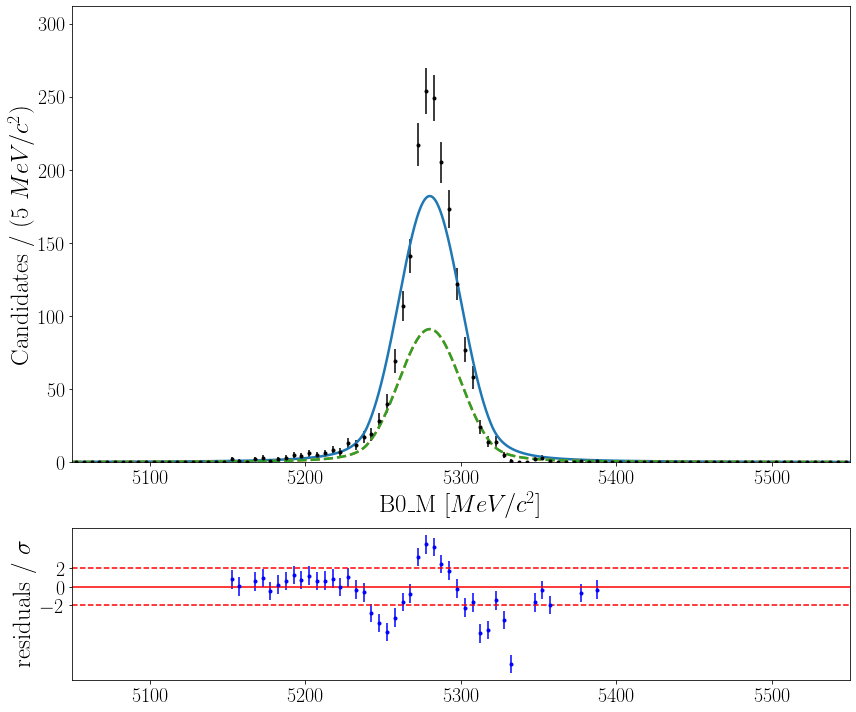

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/test/B0_M_MC_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='B0\\_M [$MeV/c^2$]', ylabel='Candidates / (5 $MeV/c^2$)'>,
 <AxesSubplot:ylabel='residuals / $\\sigma$'>)

In [16]:
plot_hist_fit(df_MC,'B0_M',None,'$MeV/c^2$',models = [model, doubleCB_MC, doubleCB_MC], obs=obs, n_bins = 100,mode_hist = False,
              name_folder = 'test',name_data = 'MC')   

In [14]:
result, params = launch_fit(doubleCB_MC, data_MC)

------------------------------------------------------------------
| FCN = 8414                    |     Ncalls=376 (376 total)     |
| EDM = 0.000473 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name         value    minuit_hesse    at limit
---------  -------  --------------  ----------
alphaL_MC    1.273     +/-    0.13       False
nL_MC        1.698     +/-    0.35       False
mu_MC   

Info: VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
Info in Current  Edm is : edm = 0.00234352
Info in Required Edm is : edmval = 0.001


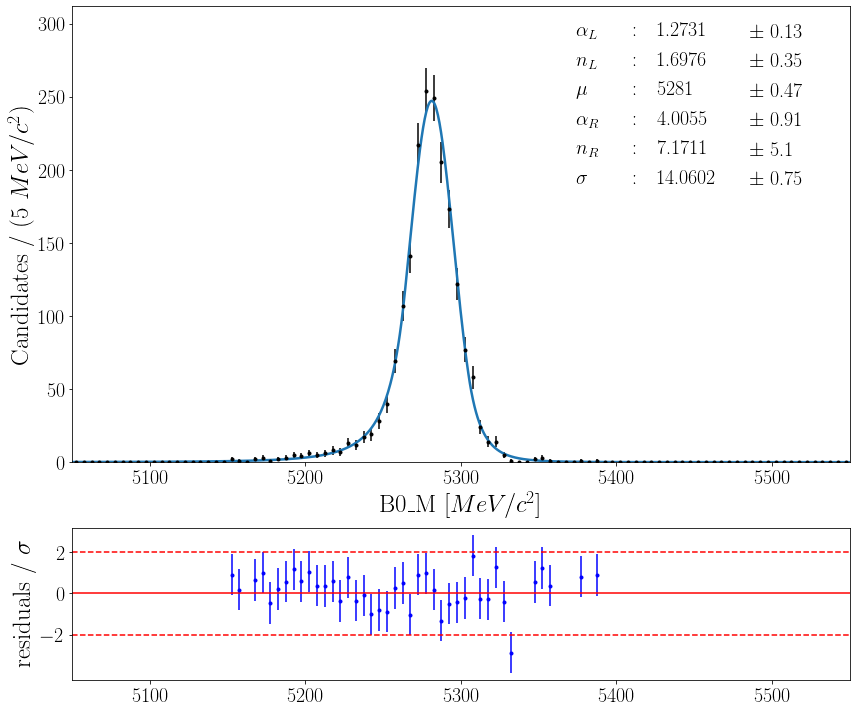

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/test/B0_M_MC_fit.pdf


In [15]:
plot_hist_fit(df_MC,'B0_M',None,'$MeV/c^2$',models = doubleCB_MC, obs=obs, n_bins = 100,mode_hist = False,
              name_folder = 'test',name_data = 'MC',params=params,name_params=name_params)   

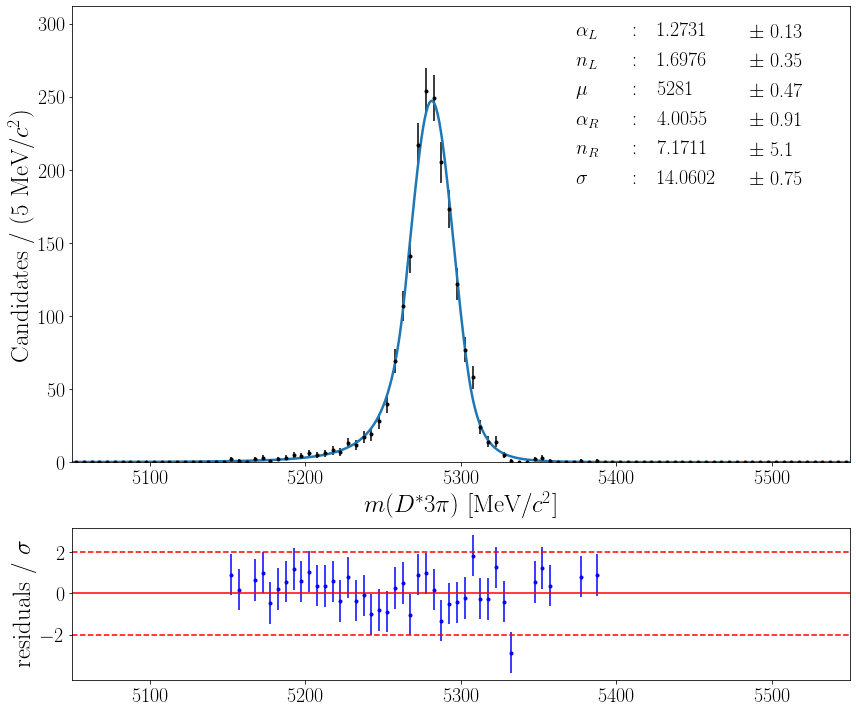

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/test/B0_M_MC_fit.pdf


In [16]:
plot_hist_fit_particle(df_MC,'B0_M', models = doubleCB_MC, obs=obs, n_bins = 100,mode_hist = False,
              name_folder = 'test',name_data = 'MC',params=params,name_params=name_params)   

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:391: UserWarning: The function <function Space.limits at 0x7fa3585353b0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:35: UserWarning: The function <function Space.area at 0x7fa35853a7a0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


InvalidArgumentError: Incompatible shapes: [1000] vs. [1922] [Op:Mul]

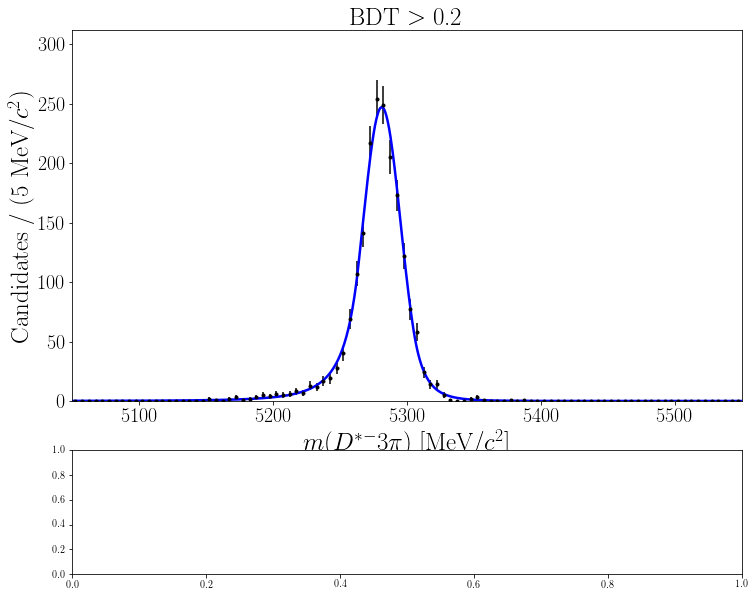

In [7]:
plot_hist_fit_particle(df_MC,'B0_M', models = [doubleCB_MC_ext,doubleCB_MC_ext],
                       name_models = ['$B^0\\to D^*D_s$','$B^0\\to D^*3\pi h$'],
                       obs=obs, n_bins = 100,mode_hist = False,
              name_folder = 'test',name_data = 'MC',cut_BDT = 0.2, params=params,name_params=name_params)   

In [ ]:
doubleCB_MC.name

In [ ]:
lambd = zfit.Parameter("lambda", -0.0008, -0.01, -0.0001)

In [ ]:
exponential_B0Ds = zfit.pdf.Exponential(lambd, obs=obs)

In [ ]:
frac = zfit.Parameter("frac", 0.5, 1, 1)

In [ ]:
model_B0Ds = zfit.pdf.SumPDF([doubleCB_MC, exponential_B0Ds],fracs = frac)

In [ ]:
model_B0Ds.name

In [13]:
exponential_B0Ds.name

'Exponential'

In [4]:
from uncertainties import ufloat

In [5]:
import json
from bd2dst3pi.locations import loc
import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import create_directory
from variables import name_params_Kpipi

In [20]:
from uncertainties import ufloat

def format_previous_params(df_params, retrieve_err=False):
    """ Remove the element in the dictionnary that ends with '_err'.
    For the other ones, removes what is after | in the keys.
    In particular: variable|BDT-0.2 will become variable
    
    @df_params_recup  :: dataframe with the result of the file 
                            this is the df saved in .json after the fit.
                            * {'alphaL': value, 'alphaL_err': value ...}
                            or
                            * {'alphaL|BDT-0.5': value, 'alphaL|BDT-0.5'_err': value ...}
    @retrieve_err     :: bool, if True, include the error of the variables in the file
                            
    @returns          :: new dataframe
    """
    
    df_params_formatted = {}
    for key, value in df_params.items():
        index = key.find('|')
        if index==-1:
            index = None
        variable = key[:index]
        if key.endswith('_err') and retrieve_err:
            if not variable.endswith('_err'):
                variable+='_err'
            
        if not key.endswith('_err') or retrieve_err:
            df_params_formatted[variable] = value

    return df_params_formatted

def get_list_without_err(params):
    """ get the list of variables from the list of fitted parameters
    @params   :: dict, fitted parameters {'alphaL': value, 'alphaL_err': value ...}
    @returns  :: list of variables (remove the keys with '_err')
    """
    keys = list(params.keys())
    variables = []
    for key in keys:
        if not key.endswith('_err'):
            variables.append(key)
    return variables



def json_to_latex_table(name_json, path, name_params, show=True):
    """ transform a json file into a latex table
    @name_json     :: str, name of the json file
    @path          :: str, path of the json file compared to loc.JSON
    @name_params   :: str, alternative name of the parameters (in latex)
    @show          :: bool, if True, shows the content of the created latex table code
    """
    name_params = format_previous_params(name_params, True)
    # Open the json file
    directory = create_directory(loc.JSON, path)
    with open(f'{directory}/{name_json}_params.json', 'r') as f:
        params = json.load(f)
    
    # Load the variables into ufloats
    variables = get_list_without_err(params)
    ufloats = {}
    for variable in variables:
        if f'{variable}_err' in params:
            ufloats[variable] = ufloat(params[variable], params[f"{variable}_err"])
    
    # Write the .tex file
    directory = create_directory(loc.TABLES, path)
    file_path = f'{directory}/{name_json}_params.tex'
    print(file_path)
    with open(file_path, 'w') as f:
        f.write('\\begin{tabular}[t]{lc}')
        f.write('\n')
        f.write('\\hline')
        f.write('\n')
        f.write('Variable &Fitted Value\\\\')
        f.write('\n')
        f.write('\\hline\\hline')
        f.write('\n')
        
        for variable, value in ufloats.items():
            formatted_value = f'{value:.2u}'.replace('+/-','\pm').replace('e+0','\\times 10^')
            name_var = name_params[variable]
            f.write(f"{name_var}&${formatted_value}$\\\\")
            f.write('\n')
            f.write('\\hline')
            f.write('\n')
        f.write("\\end{tabular}")
    if show:
        show_latex_table(name_json, path)
        
def show_latex_table(name_json, path):   
    directory = create_directory(loc.TABLES, path)
    file_path = f'{directory}/{name_json}_params.tex'
    print(file_path)
    with open(file_path, 'r') as f:
        print(f.read())

In [25]:
directory = create_directory(loc.JSON, json_file)
with open(f'{directory}/{json_file}_params.json', 'r') as f:
    params = json.load(f)

In [26]:
params2 = {}
for key, value in params.items():
    if key.endswith('_err'):
        key2 = key[:-4] + '|BDT-0.05' + '_err'
        params2[key2] = value
    else:
        params2[key + '|BDT-0.05'] = value

In [27]:
format_previous_params(params2)

{'alphaL': 2.0273733087468826,
 'alphaR': -1.7606151411318525,
 'frac': 0.4712826785332065,
 'lambda': -0.00031385757529174595,
 'mu': 5278.895665248961,
 'nL': 0.4387553541358793,
 'n_bkg': 27242.355740273724,
 'n_sig': 54438.48419577775,
 'r_bkgK': 0.03466463472193864,
 'sigmaL': 11.107116749467043,
 'sigmaR': 18.884176069811694}

In [9]:
json_file = "common_Dst_constr"
json_to_latex_table(f"{json_file}", json_file, name_params_KPiPi)
#show_latex_table("data_KPiPi_2", 'data_KPiPi')



KeyError: 'frac'